# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 : https://kosis.kr/search/search.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래역
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환
- 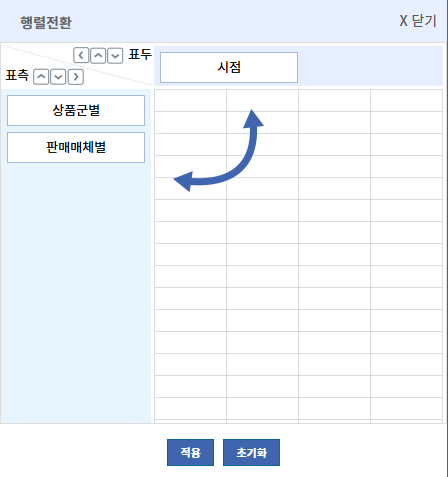 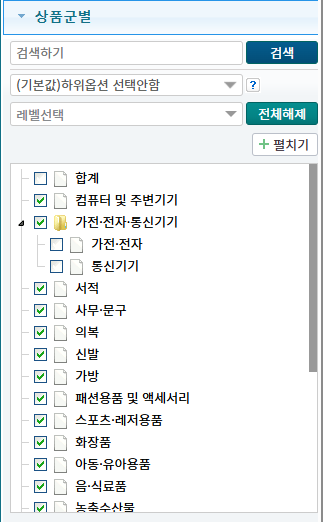

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from datetime import datetime

In [ ]:
#font설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"]="D2Coding"

In [ ]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.columns = ["category","date","internet","mobile"]
ori.tail(10)

In [ ]:
print("수정전")
print(ori["date"].tail())
ori["date"] = ori["date"].map(lambda x : x.rstrip("p)"))
print("수정후")
print(ori["date"].tail())

In [ ]:
ori["date"] = pd.to_datetime(ori["date"], format="mixed")
ori.tail()

In [ ]:
ex1_data = ori.copy()
#ex1_data[ex1_data["category"]=="의복"]
obj = ["이쿠폰서비스"]
ex1_data = ex1_data[ex1_data["category"].isin(obj)]
ex1_data.sample(20)

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
category = obj
for x in obj:
    category_data = ex1_data[ex1_data["category"] == x]
    x_data = category_data["mobile"]
    y_data = category_data["internet"]
    ax.scatter( x_data , y_data , s=10 , label = x )

ax.set_xlabel("인터넷쇼핑")
ax.set_ylabel("모바일쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,300000],"k:",alpha=0.5)
plt.show()

In [ ]:
file = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액2.csv"
jet = pd.read_csv(file,encoding = "EUC-KR")
jet.columns = ['category','internet','2017','2024']
objet = ['서적',"의복","신발","가방","화장품","가구","애완용품","음식서비스"]
jet = jet[jet["category"].isin(objet)]


In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
for x in objet:
    data = jet[jet["category"] == x]
    x = data["2017"]
    y = data["2024"]
    ax.scatter( x , y , s=10, label = x )

ax.set_xlabel("2017")
ax.set_ylabel("2024")
ax.plot([0,10000000],[0,10000000],"k-",alpha=0.7)
plt.show()